# Employee Future Prediction

# Dataset

* The dataset which we will work on is called Employee Future Prediction on kaggle : https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction

* The dataset has 9 columns (features) including target (label):

  1- Education: the education level.
  
      categorical with values: ['Bachelors', 'Masters', 'PHD']

  2- JoiningYear: the year of joining the company.

      discrete values

  3- City: employee's city

      categorical with values : ['Bangalore', 'Pune', 'New Delhi']

  4- PaymentTier: the salary tier.

      discrete with values : ['1','2','3']. 1 is the highest

  5- Age: employee's age.

      discrete values

  6- Gender: employee's gender.

      categorical with values : ['Male','Female']

  7- EverBenched: ever kept out of projects for 1 month or more.

      categorical with values : ['Yes','No']

  8- ExperienceInCurrentDomain: employee's experience

      discrete with values : ['0','1','2','3','4','5','6','7']. 7 is the highest

  9- LeaveOrNot: whether the employee will leave the company in next 2 years or not. 

      discrete with values : ['0','1']

# reading data

In [ ]:
import pandas as pd

employee = pd.read_csv('Employee.csv')

In [ ]:
employee.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


# [1] Data Preprocessing

## [1.1] Feature Representation

### [1.1.1] check if the data contains missing values

In [ ]:
employee.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

the data does not contain missing values

### [1.1.2] preprocessing categorical data

* Education column encoding: 0 = Bachelors, 1 = Masters, 2 = PHD
. This encoding implies that : Bachelors < Masters < PHD which is meaningful.

In [ ]:
def edu_mapping(x):
  if x =='Bachelors':
    return 0
  if x == 'Masters':
    return 1
  if x == 'PHD':
    return 2
  return -1

In [ ]:
employee['Education'] = employee['Education'].apply(lambda x: edu_mapping(x))

* The above method does not work with City column, so we will use one hot encoding instead.

In [ ]:
ohe = pd.get_dummies(employee['City'])
Left = employee.iloc[:, :2].join(ohe)
Right = employee.iloc[:,-6:]
employee = Left.join(Right)

* in PaymentTier column we need to swap between 3's and 1's.

In [ ]:
def pay_mapping(x):
  if x == 3:
    return 1
  if x == 1:
    return 3
  return 2

In [ ]:
employee['PaymentTier'] = employee['PaymentTier'].apply(lambda x: pay_mapping(x))

* Gender column encoding: 0 for Female, 1 for Male.

In [ ]:
employee['Gender'] = employee['Gender'].apply(lambda x: 1 if x=="Male" else 0)

* EverBenched column encoding: 0 for No, 1 for Yes.

In [ ]:
employee['EverBenched'] = employee['EverBenched'].apply(lambda x: 1 if x=="Yes" else 0)

* Final dataset after handling categorical columns

In [ ]:
employee.head(10)

,Education,JoiningYear,Bangalore,New Delhi,Pune,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,1,0,0,1,34,1,0,0,0
1,0,2013,0,0,1,3,28,0,0,3,1
2,0,2014,0,1,0,1,38,0,0,2,0
3,1,2016,1,0,0,1,27,1,0,5,1
4,1,2017,0,0,1,1,24,1,1,2,1
5,0,2016,1,0,0,1,22,1,0,0,0
6,0,2015,0,1,0,1,38,1,0,0,0
7,0,2016,1,0,0,1,34,0,0,2,1
8,0,2016,0,0,1,1,23,1,0,1,0
9,1,2017,0,1,0,2,37,1,0,2,0


## [1.2] Data Splitting : train - test

In [ ]:
from sklearn.model_selection import train_test_split

X = employee.iloc[:, :10].values

Y = employee.loc[:,'LeaveOrNot'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [ ]:
print("X_train.shape: {}  y_train.shape: {}".format(X_train.shape, y_train.shape))

X_train.shape: (3722, 10)  y_train.shape: (3722,)


In [ ]:
print("X_test.shape: {}  y_test.shape: {}".format(X_test.shape, y_test.shape))

X_test.shape: (931, 10)  y_test.shape: (931,)


## [1.3] Feature Engineering

### [1.3.1] Using Feature Engineering Techniques

* Recursive feature elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

select = RFE(RandomForestClassifier(n_estimators=100, random_state=0),n_features_to_select=5)

select.fit(X_train, y_train)
print(select.get_support())

[ True  True False False  True  True  True False False False]


* Model-based Feature Selection

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0),threshold="median")

select.fit(X_train, y_train)
print(select.get_support())

[ True  True False False False  True  True  True False False]


`` The above methods show that features with numbers 1,2,6,7 are crucial. There is a conflict on the last selected feature so we will try to use some help from another method. ``

* Univariate feature selection: precentile

In [ ]:
from sklearn.feature_selection import SelectPercentile

select = SelectPercentile(percentile=10)

select.fit(X_train, y_train)
print(select.get_support())

[False False False False False False False  True False False]


* dropping the less important features. 

In [ ]:
import numpy as np

def Feature_Engineering_Data(xtrain,xtest):
  X_train_5 = np.delete(xtrain, [2,3,4,8,9], 1)
  X_test_5 = np.delete(xtest, [2,3,4,8,9], 1)
  return X_train_5,X_test_5

### [1.3.2] Using PCA

In [ ]:
from sklearn.decomposition import PCA

def PCA_Data(xtrain,xtest):
  model = PCA(n_components=5)
  model.fit(xtrain)
  train = model.transform(xtrain)
  test = model.transform(xtest)
  return train,test

## [1.4] general preprocessing 

* Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def Normalize(xtrain,xtest):
  scaler = MinMaxScaler()
  scaler.fit(xtrain)
  N_x_train = scaler.transform(xtrain)
  N_x_test = scaler.transform(xtest)
  return N_x_train,N_x_test

# [2] Results Storing

In [ ]:
results = {}
results['Model'] = []
results['Data'] = []
results['Normalized'] = []
results['accuracy'] = []
#results['Other informations'] = []

def update_results(ModelName,accuracy,data="Original data",normalized=False,other="None"):
  results['Model'].append(ModelName)
  results['Data'].append(data)
  results['Normalized'].append(normalized)
  results['accuracy'].append(accuracy)
  #results['Other informations'].append(other)

# [3] Building Different Classification Models

* Baseline Model

In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_dummy_predictions = dummy.predict(X_test)

sc = dummy.score(X_test, y_test)
update_results('dummy classifier - Baseline model',sc)
sc

0.664876476906552

* Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)
sc = log_regression.score(X_test,y_test)
update_results('LogisticRegression',sc)
sc

0.7110633727175081

* Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
sc = naive_bayes.score(X_test,y_test)
update_results('Naive Bayes',sc)
sc

0.6895810955961332

* KNN

Text(0, 0.5, 'score')

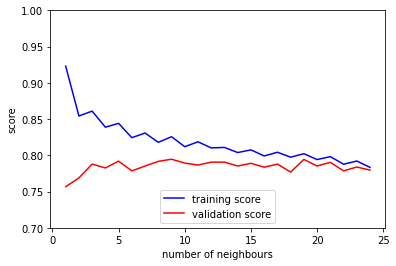

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

knn = KNeighborsClassifier()

n_n = np.arange(25)
train_score, val_score = validation_curve(knn, X_train, y_train,
                                            param_name= 'n_neighbors',
                                            param_range =n_n,
                                            cv=5)

plt.plot(n_n, np.median(train_score, 1), color='blue', label='training score')
plt.plot(n_n, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='lower center')
plt.ylim(0.7, 1)
plt.xlabel('number of neighbours')
plt.ylabel('score')

We can notice that 19 is the number of neighbours where the validation curve reaches its peak.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X_train, y_train)
sc = knn.score(X_test,y_test)
update_results('KNN',sc)
sc

0.7379162191192267

Try to normalize data then apply KNN.

Text(0, 0.5, 'score')

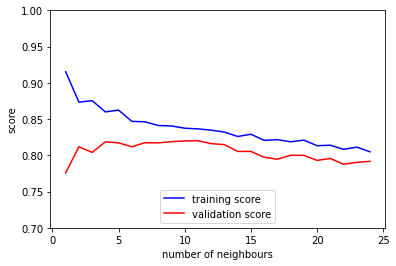

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

X_train_norm,X_test_norm = Normalize(X_train,X_test)

knn = KNeighborsClassifier()

n_n = np.arange(25)
train_score, val_score = validation_curve(knn, X_train_norm, y_train,
                                            param_name= 'n_neighbors',
                                            param_range =n_n,
                                            cv=5)

plt.plot(n_n, np.median(train_score, 1), color='blue', label='training score')
plt.plot(n_n, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='lower center')
plt.ylim(0.7, 1)
plt.xlabel('number of neighbours')
plt.ylabel('score')

We can notice that 11 is the number of neighbours where the validation curve reaches its peak.

In [ ]:
knn = KNeighborsClassifier(n_neighbors =11)
knn.fit(X_train_norm, y_train)
sc = knn.score(X_test_norm,y_test)
update_results('KNN',sc,normalized = True)
sc

0.8012889366272825

trying to use Normalized feature engineer data to fit KNN.

Text(0, 0.5, 'score')

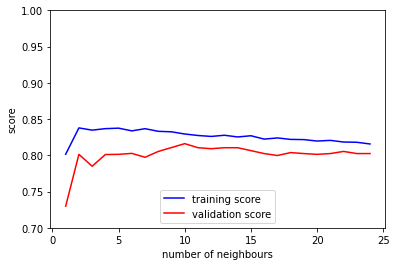

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

X_train_eng,X_test_eng = Feature_Engineering_Data(X_train,X_test)
X_train_eng,X_test_eng = Normalize(X_train_eng,X_test_eng)

knn = KNeighborsClassifier()

n_n = np.arange(25)
train_score, val_score = validation_curve(knn, X_train_eng, y_train,
                                            param_name= 'n_neighbors',
                                            param_range =n_n,
                                            cv=5)

plt.plot(n_n, np.median(train_score, 1), color='blue', label='training score')
plt.plot(n_n, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='lower center')
plt.ylim(0.7, 1)
plt.xlabel('number of neighbours')
plt.ylabel('score')

We can notice that 10 is the number of neighbours where the validation curve reaches its peak.

In [ ]:
knn = KNeighborsClassifier(n_neighbors =10)
knn.fit(X_train_eng, y_train)
sc = knn.score(X_test_eng,y_test)
update_results('KNN',sc,data="Feature Engineering Data",normalized = True)
sc

0.8055853920515574

trying to use normalized PCA Data to fit KNN.

Text(0, 0.5, 'score')

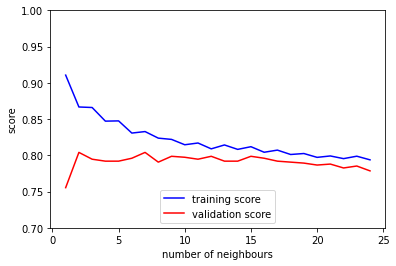

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

X_train_pca,X_test_pca = PCA_Data(X_train,X_test)
X_train_pca,X_test_pca = Normalize(X_train_pca,X_test_pca)

knn = KNeighborsClassifier()

n_n = np.arange(25)
train_score, val_score = validation_curve(knn, X_train_pca, y_train,
                                            param_name= 'n_neighbors',
                                            param_range =n_n,
                                            cv=5)

plt.plot(n_n, np.median(train_score, 1), color='blue', label='training score')
plt.plot(n_n, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='lower center')
plt.ylim(0.7, 1)
plt.xlabel('number of neighbours')
plt.ylabel('score')

We can notice that 9 is the number of neighbours where the validation curve reaches its peak.

In [ ]:
knn = KNeighborsClassifier(n_neighbors =9)
knn.fit(X_train_pca, y_train)
sc = knn.score(X_test_pca,y_test)
update_results('KNN',sc,data="PCA Data",normalized = True)
sc

0.7712137486573577

* SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC()

param_grid = [
              {'kernel': ['linear'],'C': [0.1,1, 10, 100]},
              {'kernel': ['poly'] ,'C': [0.1,1, 10, 100],'degree': [2,3,4,6],'coef0': [0.1,1, 10]},
              {'kernel': ['rbf'] ,'C': [0.1,1, 10, 100],'gamma': [1,0.1,0.01,0.001]},
]

grid = GridSearchCV(svm, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100], 'coef0': [0.1, 1, 10],
                          'degree': [2, 3, 4, 6], 'kernel': ['poly']},
                         {'C': [0.1, 1, 10, 100],
                          'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}])

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
svm_best = grid.best_estimator_
svm_best.fit(X_train, y_train)
sc = svm_best.score(X_test,y_test)
update_results('SVM',sc)
sc

0.8141783029001074

SVM is sensitive to the scale of the features.Here we try to normalize then train SVM Model.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X_train_norm,X_test_norm = Normalize(X_train,X_test)
svm = SVC()

param_grid = [
              {'kernel': ['linear'],'C': [0.1,1, 10, 100]},
              {'kernel': ['poly'] ,'C': [0.1,1, 10, 100],'degree': [2,3],'coef0': [0.1,0.5]},
              {'kernel': ['rbf'] ,'C': [0.1,1, 10, 100],'gamma': [1,0.1,0.01,0.001]},
]

grid = GridSearchCV(svm, param_grid, cv=5)
grid.fit(X_train_norm, y_train)
grid.best_params_

{'C': 100, 'coef0': 0.1, 'degree': 3, 'kernel': 'poly'}

In [ ]:
svm_best = grid.best_estimator_
svm_best.fit(X_train_norm, y_train)
sc = svm_best.score(X_test_norm,y_test)
update_results('SVM',sc,normalized=True)
sc

0.841031149301826

* Decision Tree

Text(0, 0.5, 'score')

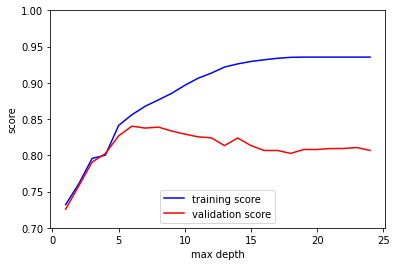

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier()
n_n = np.arange(25)
train_score, val_score = validation_curve(decisionTree, X_train, y_train,
                                            param_name= 'max_depth',
                                            param_range =n_n,
                                            cv=5)

plt.plot(n_n, np.median(train_score, 1), color='blue', label='training score')
plt.plot(n_n, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='lower center')
plt.ylim(0.7, 1)
plt.xlabel('max depth')
plt.ylabel('score')

We can notice that 6 is the max depth where the validation curve reaches its peak.

In [ ]:
decisionTree_best = DecisionTreeClassifier(max_depth = 6)
decisionTree_best.fit(X_train,y_train)
sc = decisionTree_best.score(X_test,y_test)
update_results('Decision Tree',sc)
sc

0.8345864661654135

* Let's try Decision Tree with Feature Engineered data.

Text(0, 0.5, 'score')

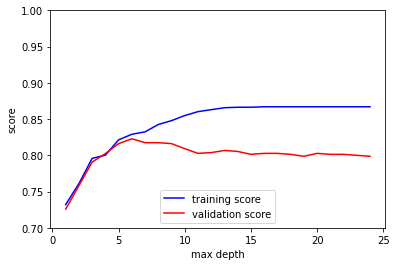

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_train_eng,X_test_eng = Feature_Engineering_Data(X_train,X_test)

decisionTree = DecisionTreeClassifier()
n_n = np.arange(25)
train_score, val_score = validation_curve(decisionTree, X_train_eng, y_train,
                                            param_name= 'max_depth',
                                            param_range =n_n,
                                            cv=5)

plt.plot(n_n, np.median(train_score, 1), color='blue', label='training score')
plt.plot(n_n, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='lower center')
plt.ylim(0.7, 1)
plt.xlabel('max depth')
plt.ylabel('score')

We can notice that 6 is the max depth where the validation curve reaches its peak.

In [ ]:
decisionTree = DecisionTreeClassifier(max_depth = 6)
decisionTree.fit(X_train_eng,y_train)
sc = decisionTree.score(X_test_eng,y_test)
update_results('Decision Tree',sc,data="Feature Engineering data")
sc

0.807733619763695

Let's try Decision Tree with PCA.

Text(0, 0.5, 'score')

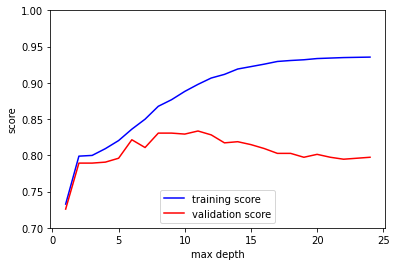

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_train_pca,X_test_pca = PCA_Data(X_train,X_test)

decisionTree = DecisionTreeClassifier()
n_n = np.arange(25)
train_score, val_score = validation_curve(decisionTree, X_train_pca, y_train,
                                            param_name= 'max_depth',
                                            param_range =n_n,
                                            cv=5)

plt.plot(n_n, np.median(train_score, 1), color='blue', label='training score')
plt.plot(n_n, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='lower center')
plt.ylim(0.7, 1)
plt.xlabel('max depth')
plt.ylabel('score')

We can notice that 9 is the max depth where the validation curve reaches its peak.

In [ ]:
decisionTree = DecisionTreeClassifier(max_depth = 9)
decisionTree.fit(X_train_pca,y_train)
sc = decisionTree.score(X_test_pca,y_test)
update_results('Decision Tree',sc,data="PCA data")
sc

0.8120300751879699

* Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_jobs=-1, random_state=10)

param_grid = [
              {'n_estimators':np.arange(4,25),'max_depth':np.arange(1,15),}
]

grid = GridSearchCV(random_forest, param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 9, 'n_estimators': 18}

In [ ]:
random_forest_best = grid.best_estimator_
random_forest_best.fit(X_train, y_train)
sc = random_forest_best.score(X_test,y_test)
update_results('Random Forest',sc)
sc

0.8431793770139635

* adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(DecisionTreeClassifier(),algorithm="SAMME.R",random_state=42)
param_grid = [
              {'n_estimators':np.arange(4,25),'base_estimator__max_depth':np.arange(1,15),'learning_rate':[0.5,1]}
]

grid = GridSearchCV(adaboost, param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_params_
# adaboost.get_params().keys()

{'base_estimator__max_depth': 3, 'learning_rate': 1, 'n_estimators': 17}

In [ ]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 3),algorithm="SAMME.R",random_state=42,learning_rate=1,n_estimators=17)
adaboost.fit(X_train, y_train)
sc = adaboost.score(X_test,y_test)
update_results('Adaboost',sc)
sc

0.8227712137486574

try to use feature engineering data to fit adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

X_train_eng,X_test_eng = Feature_Engineering_Data(X_train,X_test)

adaboost = AdaBoostClassifier(DecisionTreeClassifier(),algorithm="SAMME.R",random_state=42)
param_grid = [
              {'n_estimators':np.arange(4,25),'base_estimator__max_depth':np.arange(1,15),'learning_rate':[0.5,1]}
]

grid = GridSearchCV(adaboost, param_grid, cv=5)
grid.fit(X_train_eng, y_train)
grid.best_params_

{'base_estimator__max_depth': 5, 'learning_rate': 1, 'n_estimators': 4}

In [ ]:
adaboost_best = grid.best_estimator_
adaboost_best.fit(X_train_eng, y_train)
sc = adaboost_best.score(X_test_eng,y_test)
update_results('Adaboost',sc,data="Feature Engineering Data")
sc

0.8098818474758325

try to use PCA Data to fit adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

X_train_pca,X_test_pca = PCA_Data(X_train,X_test)

adaboost = AdaBoostClassifier(DecisionTreeClassifier(),algorithm="SAMME.R",random_state=42)
param_grid = [
              {'n_estimators':np.arange(20,32),'base_estimator__max_depth':np.arange(1,15),'learning_rate':[0.5,1]}
]

grid = GridSearchCV(adaboost, param_grid, cv=5)
grid.fit(X_train_pca, y_train)
grid.best_params_

{'base_estimator__max_depth': 3, 'learning_rate': 0.5, 'n_estimators': 25}

In [ ]:
adaboost_best = grid.best_estimator_
adaboost_best.fit(X_train_pca, y_train)
sc = adaboost_best.score(X_test_pca,y_test)
update_results('Adaboost',sc,data="PCA Data")
sc

0.8109559613319012

* Soft Voting Model

In [ ]:
from pandas.core.common import random_state
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('random forest', random_forest_best), ('dt', decisionTree_best), ('adaboost', adaboost) ],
    voting='soft')
voting_clf.fit(X_train, y_train)
sc = voting_clf.score(X_test,y_test)
update_results('Soft Voting (best 3 models)',sc)
sc

0.8539205155746509

* Hard Voting Model

In [ ]:
hard_voting = VotingClassifier(
    estimators=[('random forest', random_forest_best), ('dt', decisionTree_best), ('adaboost', adaboost) ],
    voting='hard')
hard_voting.fit(X_train, y_train)
sc = hard_voting.score(X_test,y_test)
update_results('Hard Voting (best 3 models)',sc)
sc

0.8431793770139635

In [ ]:
df = pd.DataFrame(results)
df

,Model,Data,Normalized,accuracy
0,dummy classifier - Baseline model,Original data,False,0.664876
1,LogisticRegression,Original data,False,0.711063
2,Naive Bayes,Original data,False,0.689581
3,KNN,Original data,False,0.737916
4,KNN,Original data,True,0.801289
5,KNN,Feature Engineering Data,True,0.805585
6,KNN,PCA Data,True,0.771214
7,SVM,Original data,False,0.814178
8,SVM,Original data,True,0.841031
9,Decision Tree,Original data,False,0.834586


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_train_eng,X_test_eng = Feature_Engineering_Data(X_train,X_test)

random_forest = RandomForestClassifier(n_jobs=-1, random_state=10)

param_grid = [
              {'n_estimators':np.arange(4,25),'max_depth':np.arange(1,15),}
]

grid = GridSearchCV(random_forest, param_grid, cv=5)
grid.fit(X_train_eng, y_train)
grid.best_params_

{'max_depth': 7, 'n_estimators': 7}

In [ ]:
random_forest_best = grid.best_estimator_
random_forest_best.fit(X_train_eng, y_train)
sc = random_forest_best.score(X_test_eng,y_test)
#update_results('Random Forest',sc)
sc

0.7948442534908701

In [ ]:

X_train_pca,X_test_pca = PCA_Data(X_train,X_test)

random_forest = RandomForestClassifier(n_jobs=-1, random_state=10)

param_grid = [
              {'n_estimators':np.arange(4,25),'max_depth':np.arange(1,15),}
]

grid = GridSearchCV(random_forest, param_grid, cv=5)
grid.fit(X_train_pca, y_train)
grid.best_params_

{'max_depth': 11, 'n_estimators': 23}

In [ ]:
random_forest_best = grid.best_estimator_
random_forest_best.fit(X_train_pca, y_train)
sc = random_forest_best.score(X_test_pca,y_test)
#update_results('Random Forest',sc)
sc

0.8216970998925887